In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Data/final_df.csv')

# Part One: Cleaning and preparing data

In [5]:
df = pd.read_csv('/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Data/final_df.csv')

# Keep only the lyrics column and the year (which is the label) column to do multinomial NB

df = df[['lyrics' , 'year']]


# The label for each song would be the decade in which it was released (50s,60s,70s,...,2010s)
# Convert the "lyrics" column to one of these classes: 50s,60s,70s,80s,90s,00s,2010s (ex: 1967 --> 60s)

for i in np.arange(0,len(df)):
    decade = df['year'][i]

    if decade <1960:
        df['year'][i] = '50s'
    
    elif decade <1970:
        df['year'][i] = '60s'
    
    elif decade <1980:
        df['year'][i] = '70s'

    elif decade <1990:
        df['year'][i] = '80s'

    elif decade <2000:
        df['year'][i] = '90s'

    elif decade <2010:
        df['year'][i] = '00s'
    
    else:
        df['year'][i] = '2010s'




In [6]:
# Clean the lyrics of songs (remove stop words, etc.)

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

sw_nltk = stopwords.words('english')



for i in range(len(df)):

    query = df['lyrics'][i].replace("\n" , " ")

    querywords = query.split()  

    resultwords  = [word for word in querywords if word.lower() not in sw_nltk]

    result = ' '.join(resultwords)

    df['lyrics'][i] = result

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonymoubarak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
y1=[]
for label in df["year"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

index = 0 : label = 50s
index = 1 : label = 60s
index = 2 : label = 70s
index = 3 : label = 80s
index = 4 : label = 90s
index = 5 : label = 00s
index = 6 : label = 2010s


In [8]:
y1 = df['year']

In [9]:
# Convert lyrics to list of strings
corpus=df["lyrics"].to_list()

In [10]:
# INITIALIZE COUNT VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
vectorizer=CountVectorizer(min_df=0.0001)   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

#CONVERT TO ONE-HOT VECTORS
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

# DOUBLE CHECK 
print(X.shape,y1.shape)
print("DATA POINT-0:",X[0,0:10],"y1 =",y1[0])

(4416, 21383) (4416,)
DATA POINT-0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] y1 = 50s


In [11]:
#INSERT CODE TO PARTITION DATASET INTO TRAINING-TESTING

from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)


In [12]:
# Function to report accuracy
def report(y,ypred):
      #ACCURACY COMPUTE 
      print("Accuracy:",accuracy_score(y, ypred)*100)
      print("Number of mislabeled points out of a total %d points = %d"
            % (y.shape[0], (y != ypred).sum()))

def print_model_summary():
      # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
      yp_train = model.predict(x_train)
      yp_test = model.predict(x_test)

      print("ACCURACY CALCULATION\n")

      print("TRAINING SET:")
      report(y_train,yp_train)

      print("\nTEST SET (UNTRAINED DATA):")
      report(y_test,yp_test)



# Part Two: Train a Multinomial Naive Bayes model

In [13]:
from sklearn.naive_bayes import MultinomialNB

# INITIALIZE MODEL 
model = MultinomialNB()

# TRAIN MODEL 
model.fit(x_train,y_train)

# Predict values
ypred = model.predict(x_test)

# PRINT REPORT USING UTILITY FUNCTION ABOVE
print_model_summary()

ACCURACY CALCULATION

TRAINING SET:
Accuracy: 72.96149490373726
Number of mislabeled points out of a total 3532 points = 955

TEST SET (UNTRAINED DATA):
Accuracy: 40.723981900452486
Number of mislabeled points out of a total 884 points = 524


# Part Three: Analyze results and compare accuracy to baseline model

In [14]:
import random
df['predictions'] = ''

number_list = ['50s', '60s', '70s', '80s', '90s', '00s' , '2010s']
for i in range(len(df)):
    df['predictions'][i] = random.choice(number_list)
    

In [15]:
print("Random classifier accuracy: " , sum(df['year'] == df['predictions'])/len(df))

Random classifier accuracy:  0.1383605072463768


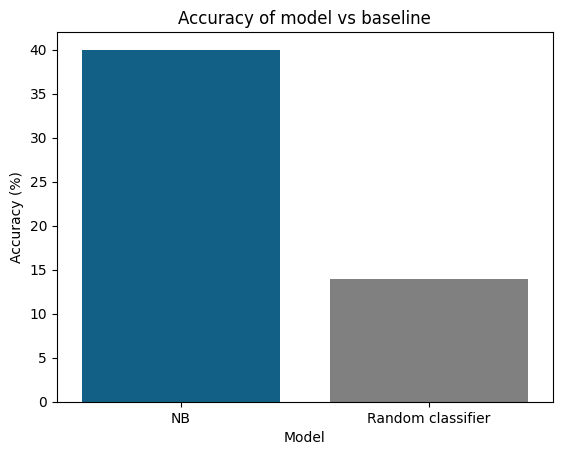

In [22]:
# Compare model accuracies using a bar chart
from json.tool import main
from turtle import title
import seaborn as sns
import pandas as pd
df_accuracies = pd.DataFrame({'Model':['NB','Random classifier'], 'Accuracy (%)': [40,14]})
sns.barplot(data=df_accuracies, x="Model", y="Accuracy (%)" ,  palette= ['#006699','grey']).set(title = 'Accuracy of model vs baseline' )
plt.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/multinom_performance.png")

##### The NB model i built (76% accuracy) is 60% more accurate than a baseline random classifier model.

In [17]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(
        y_test, ypred)


/Users/anthonymoubarak/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


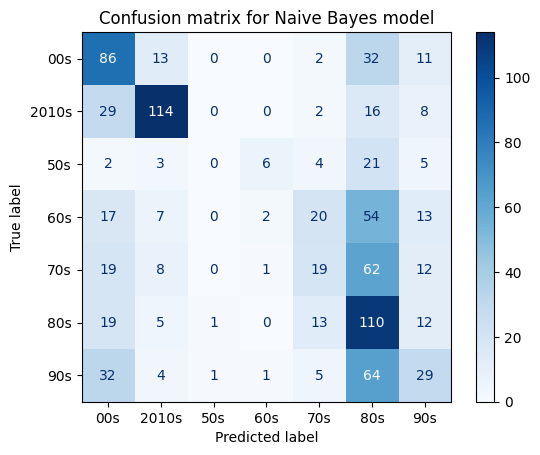

In [31]:
from locale import normalize
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model , x_test ,  y_test ,  cmap="Blues")
plt.title("Confusion matrix for Naive Bayes model")
plt.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/confusion_matrix.png")